In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Boston Dataset 

### Dataset loading

In [21]:
#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets

boston = datasets.load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dataframe transform  

In [22]:
from pandas import DataFrame

boston_frame = DataFrame(boston.data)
boston_frame.columns = boston.feature_names
boston_frame['target'] = boston.target
boston_frame.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Feature plots

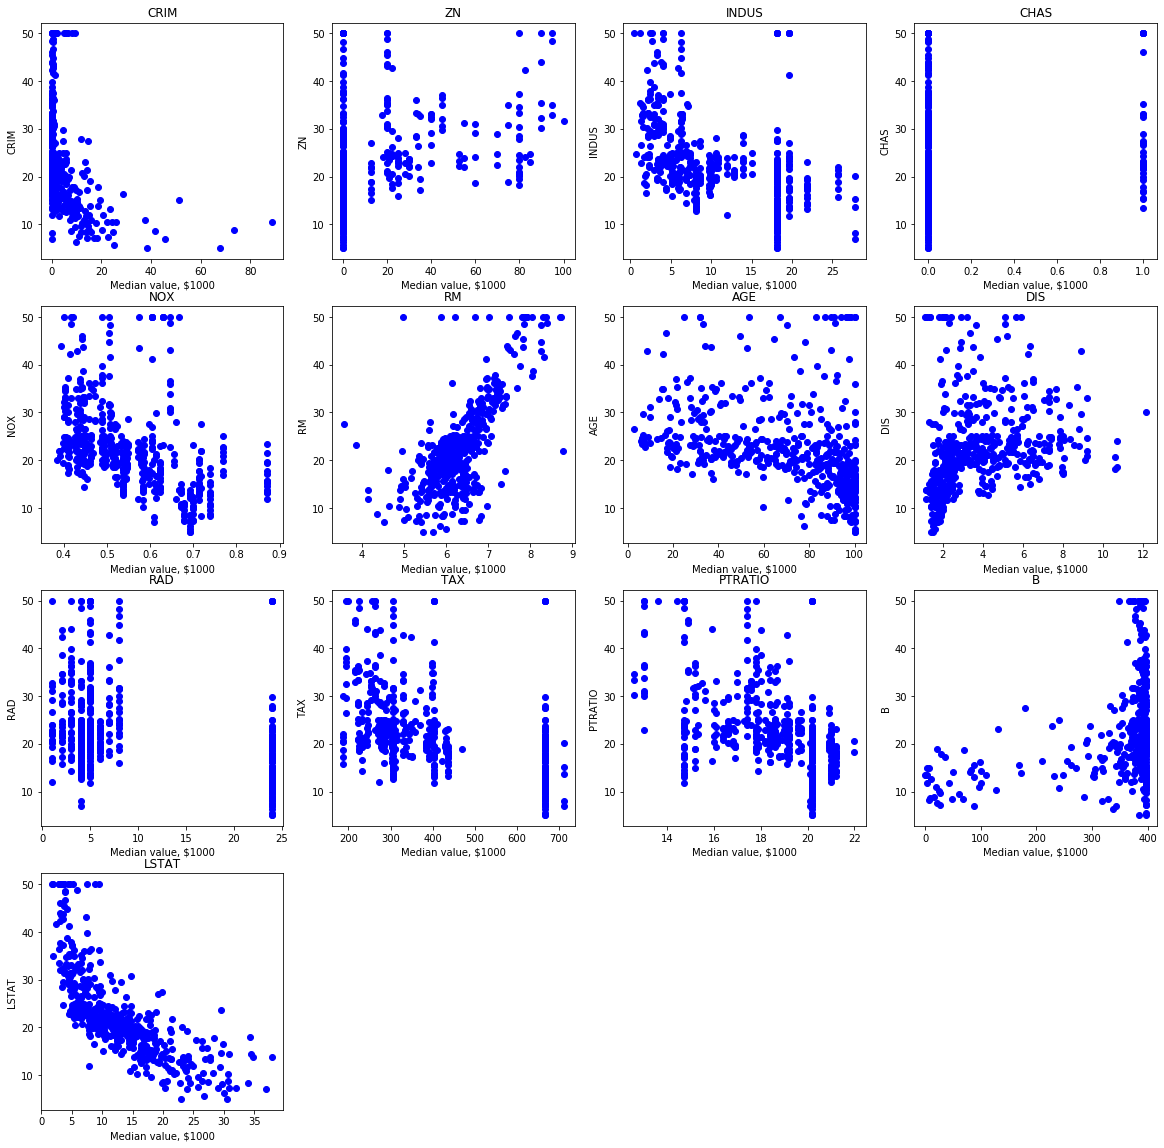

In [23]:
pyplot.figure(figsize(20, 20))

plot_number = 0

for feature_name in boston.feature_names:
    pyplot.subplot(4, 4, plot_number + 1)
    pyplot.scatter(list(map(lambda x : x[plot_number], boston.data)), boston.target, color = 'b')
    pyplot.title(feature_name)
    pyplot.xlabel('Median value, $1000')
    pyplot.ylabel(feature_name)
    plot_number += 1

### Linear regression model learning

In [24]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(boston.data, boston.target)
boston_predictions = linear_regressor.predict(boston.data)


### Basic estimators

In [25]:
from sklearn import metrics

mea = metrics.mean_absolute_error(boston.target, boston_predictions)
print ('MAE = ', mea)
msa = metrics.mean_squared_error(boston.target, boston_predictions)
print ('MSE = ', msa)


MAE =  3.2708628109003115
MSE =  21.894831181729202


### Error plotting

Text(0, 0.5, 'target')

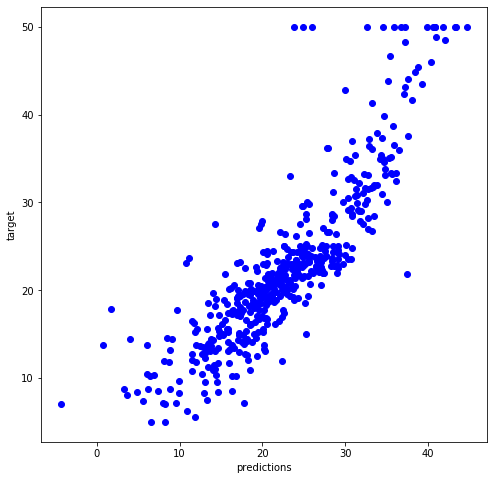

In [26]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(boston_predictions, boston.target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')


### Linear regression function

In [27]:
print ("Model")
print ("y = {:.3f}*x1 + {:.3f}*x2 + ... + {:.3f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))


Model
y = -0.108*x1 + 0.046*x2 + ... + 36.459


# Generated dataset

### Generate dataset

In [28]:
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
data, target, coef = datasets.make_regression(n_samples=230, n_features = 23, n_informative = 5, n_targets = 1, 
                                              noise = random.randint(1,20), coef = True, random_state = 2)  

### Plot data

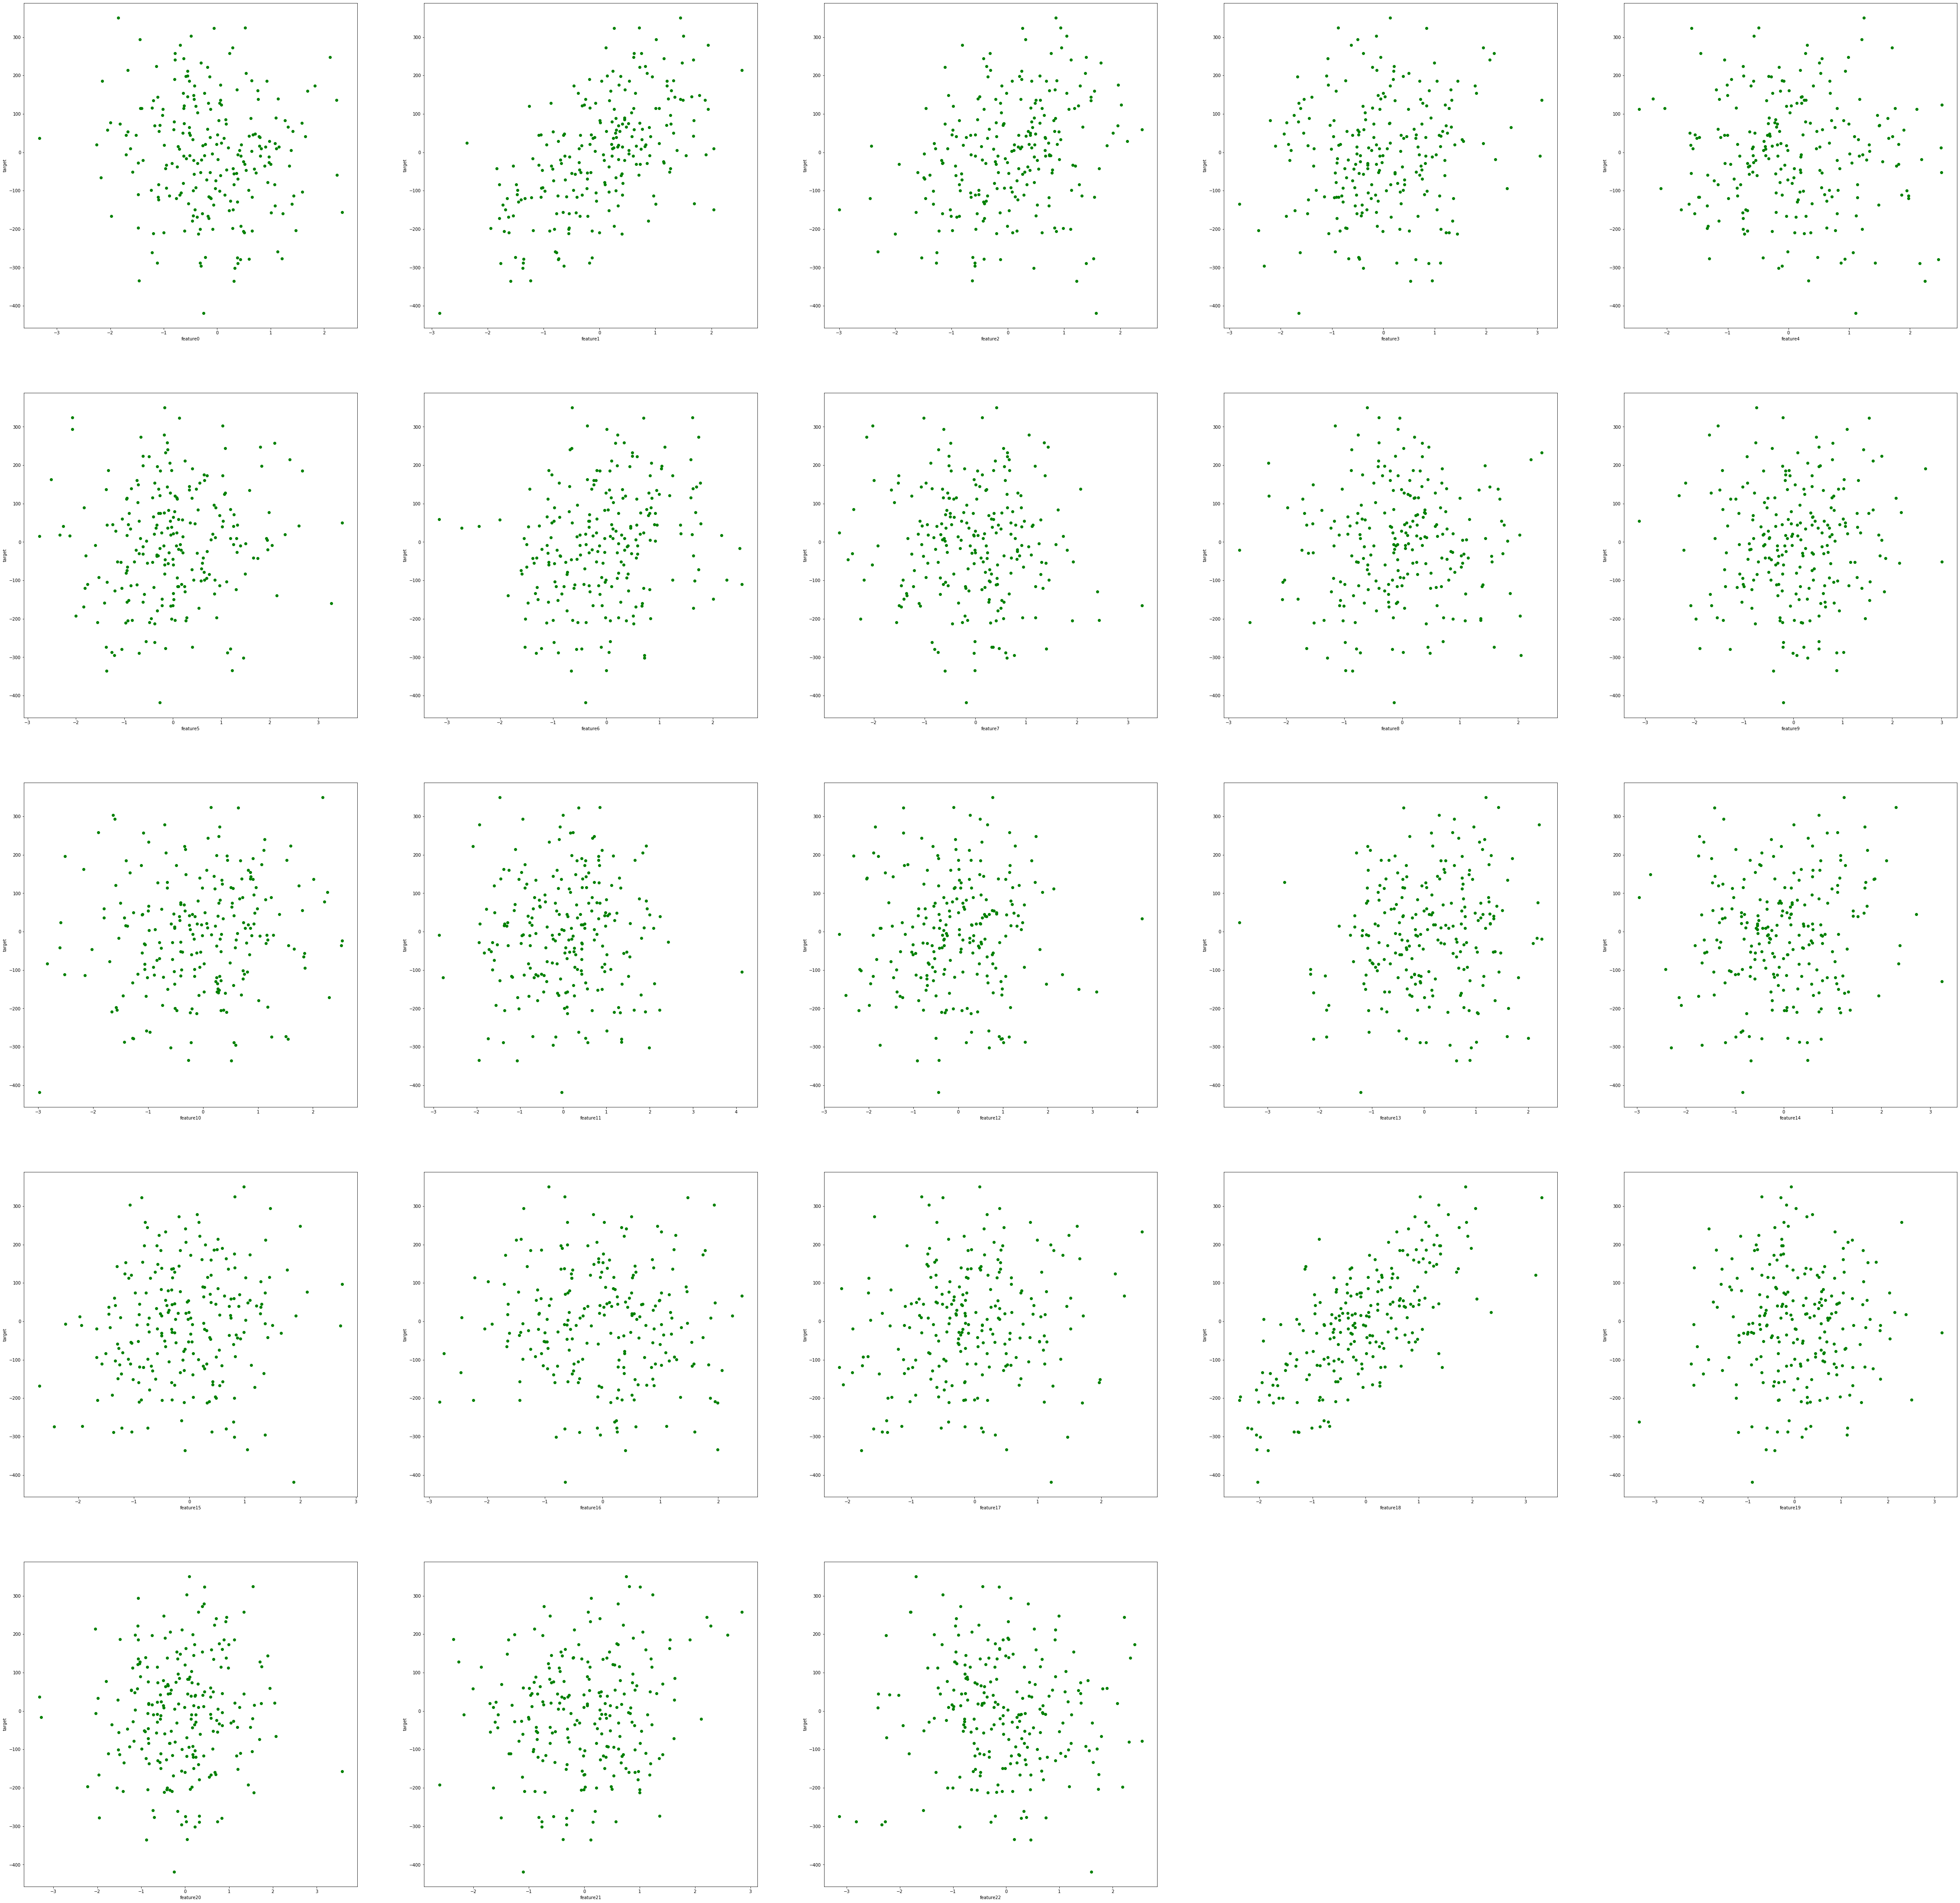

In [29]:
pyplot.figure(figsize(80, 80))

for i in range(23):
    pyplot.subplot(5,5, i + 1)
    pyplot.scatter(list(map(lambda x : x[i], data)), target, color = 'g')
    pyplot.xlabel('feature'+ str(i))
    pyplot.ylabel('target')

### Learn linear regression model and get predictions

In [30]:
regression_model = linear_model.LinearRegression()
regression_model.fit(data, target)
predictions = regression_model.predict(data)

### Print linear regression coefficients

In [31]:
print ("Model coefficients")
print ('x0 = ', regression_model.intercept_)
print ('x1, x2 = ', regression_model.coef_)

Model coefficients
x0 =  -0.4092792350205592
x1, x2 =  [-1.27455371 90.88436338 43.55567651  0.59746013  1.76021542  3.6941501
 48.68456435  2.07420472  0.59294792 -1.41158124  0.45313071  0.95891286
 -1.50624703 -1.9427521  26.46322575 -0.24592367 -0.63786971  0.51693114
 93.56846793 -0.61419785  0.67627601 -1.29437141  1.97509188]


### Plot predictions

Text(0, 0.5, 'target')

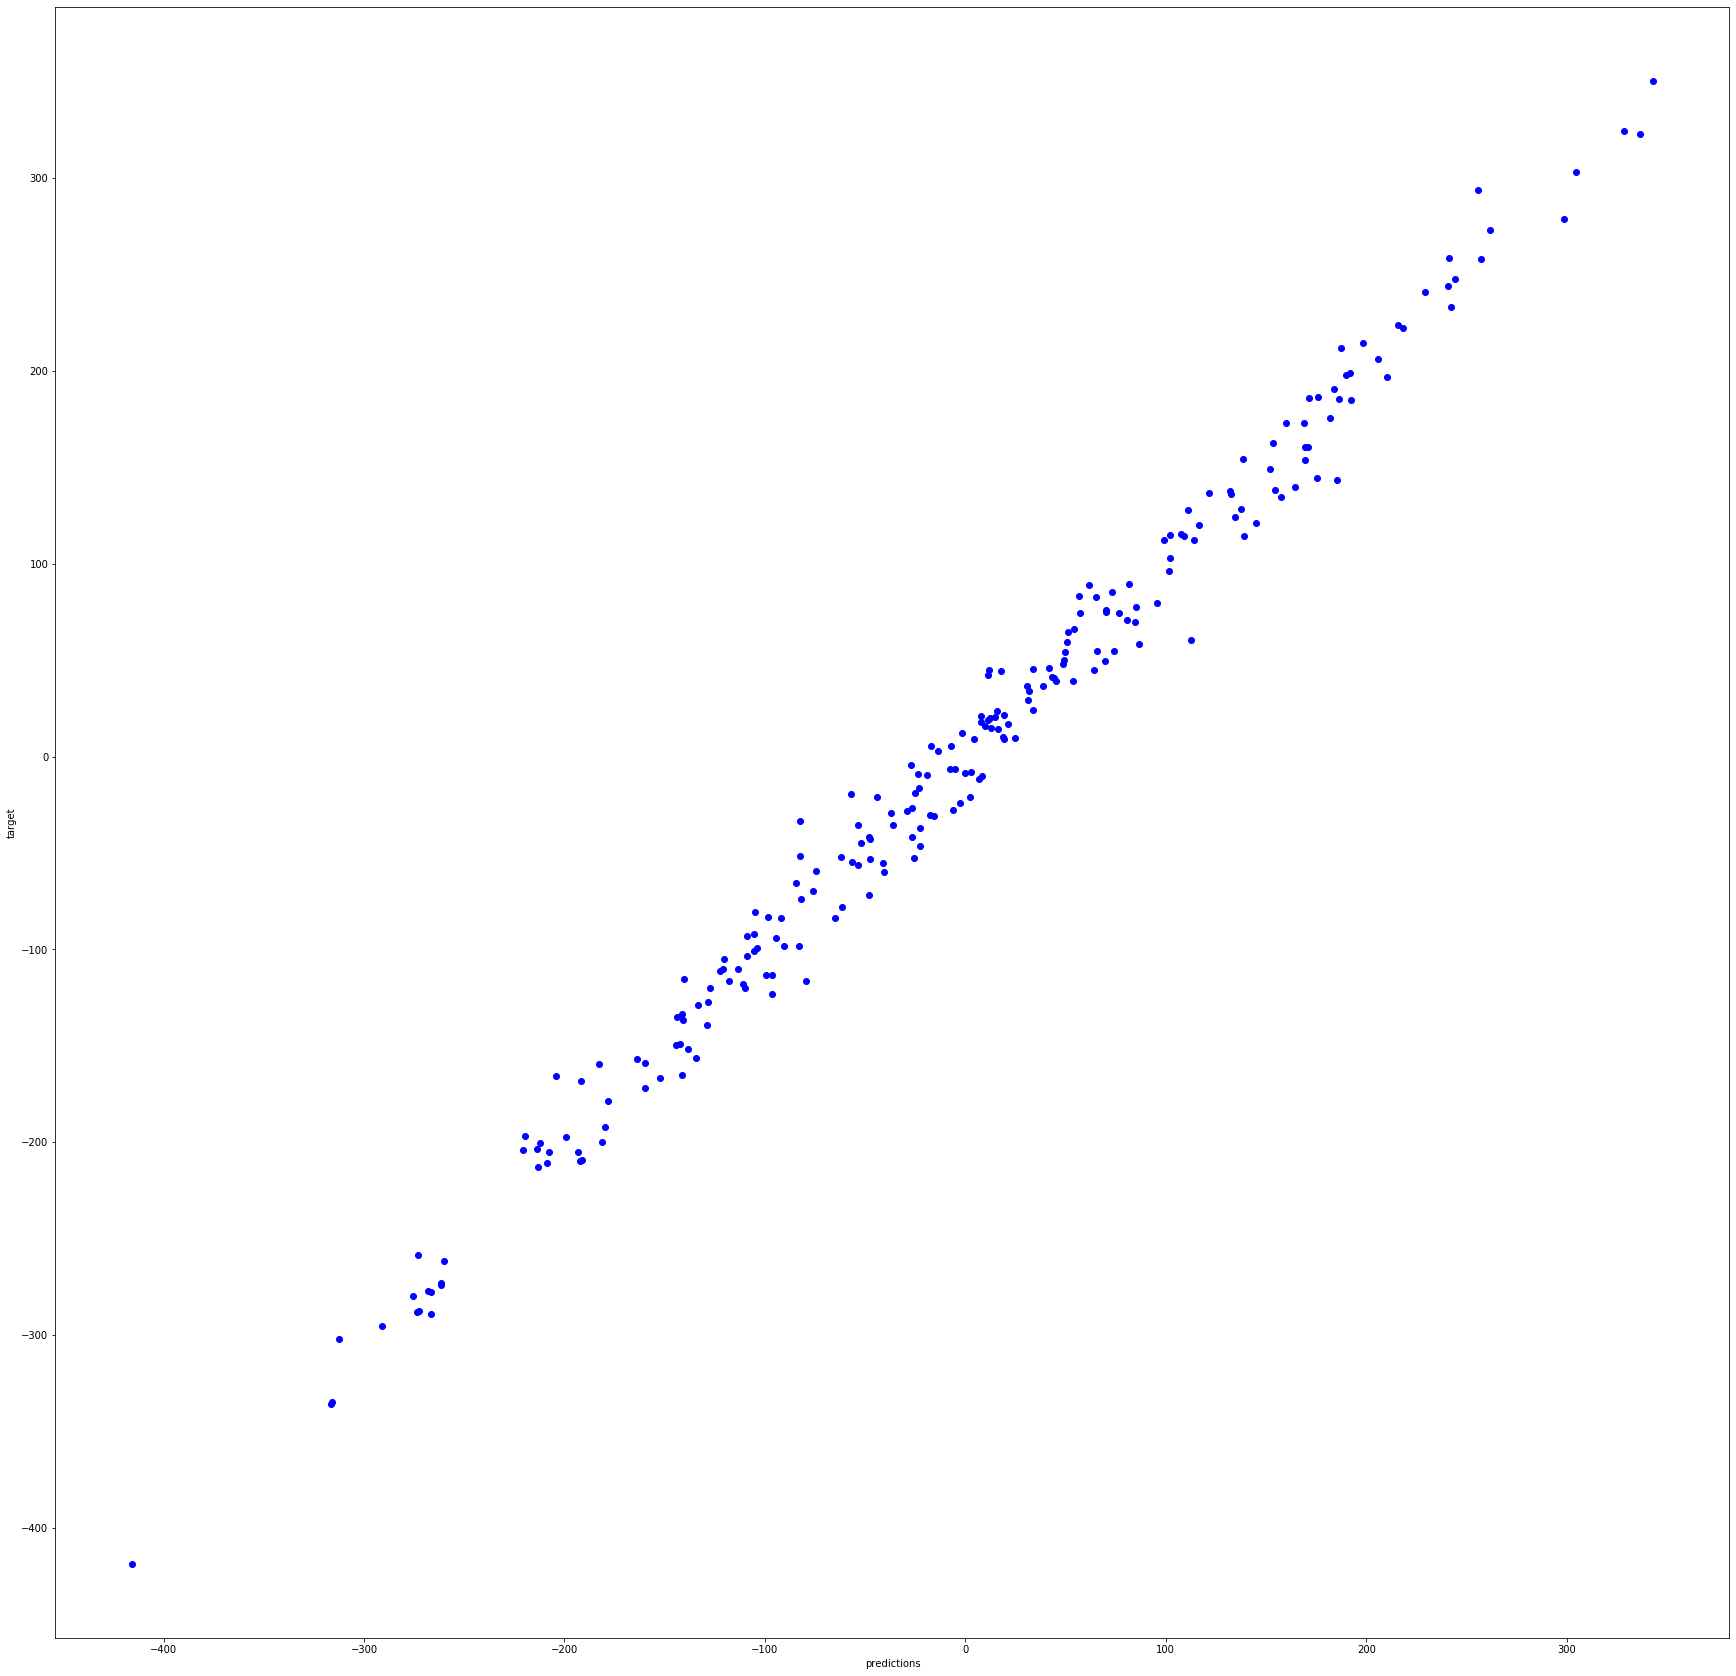

In [32]:
pyplot.figure(figsize(30, 30))
pyplot.scatter(predictions, target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')

### Print learned and true regression models

In [35]:
uravn = "y = "
for i in range(23):
    uravn += "{:.3f}x" + str(i + 1)
    if i != 22:
        uravn += " + "
print(uravn)

y = {:.3f}x1 + {:.3f}x2 + {:.3f}x3 + {:.3f}x4 + {:.3f}x5 + {:.3f}x6 + {:.3f}x7 + {:.3f}x8 + {:.3f}x9 + {:.3f}x10 + {:.3f}x11 + {:.3f}x12 + {:.3f}x13 + {:.3f}x14 + {:.3f}x15 + {:.3f}x16 + {:.3f}x17 + {:.3f}x18 + {:.3f}x19 + {:.3f}x20 + {:.3f}x21 + {:.3f}x22 + {:.3f}x23


In [36]:
print ("Learned regression model")
print ((uravn + " + {:.3f}\n").format( regression_model.coef_[0], 
                                     regression_model.coef_[1],
                                     regression_model.coef_[2],
                                     regression_model.coef_[3],
                                     regression_model.coef_[4],
                                     regression_model.coef_[5],
                                     regression_model.coef_[6],
                                     regression_model.coef_[7],
                                     regression_model.coef_[8],
                                     regression_model.coef_[9],
                                     regression_model.coef_[10],
                                     regression_model.coef_[11],
                                     regression_model.coef_[12],
                                     regression_model.coef_[13],
                                     regression_model.coef_[14],
                                     regression_model.coef_[15],
                                     regression_model.coef_[16],
                                     regression_model.coef_[17],
                                     regression_model.coef_[18],
                                     regression_model.coef_[19],
                                     regression_model.coef_[20],
                                     regression_model.coef_[21],
                                     regression_model.coef_[22],
                                     regression_model.intercept_))
print ("True regression model")
print (uravn.format( coef[0], 
                     coef[1],
                     coef[2],
                     coef[3],
                     coef[4],
                     coef[5],
                     coef[6],
                     coef[7],
                     coef[8],
                     coef[9],
                     coef[10],
                     coef[11],
                     coef[12],
                     coef[13],
                     coef[14],
                     coef[15],
                     coef[16],
                     coef[17],
                     coef[18],
                     coef[19],
                     coef[20],
                     coef[21],
                     coef[22]))

Learned regression model
y = -1.275x1 + 90.884x2 + 43.556x3 + 0.597x4 + 1.760x5 + 3.694x6 + 48.685x7 + 2.074x8 + 0.593x9 + -1.412x10 + 0.453x11 + 0.959x12 + -1.506x13 + -1.943x14 + 26.463x15 + -0.246x16 + -0.638x17 + 0.517x18 + 93.568x19 + -0.614x20 + 0.676x21 + -1.294x22 + 1.975x23 + -0.409

True regression model
y = 0.000x1 + 89.191x2 + 44.607x3 + 0.000x4 + 0.000x5 + 0.000x6 + 47.924x7 + 0.000x8 + 0.000x9 + 0.000x10 + 0.000x11 + 0.000x12 + 0.000x13 + 0.000x14 + 25.967x15 + 0.000x16 + 0.000x17 + 0.000x18 + 95.136x19 + 0.000x20 + 0.000x21 + 0.000x22 + 0.000x23


### Print evaluation metrics

In [34]:
mae = metrics.mean_absolute_error(target, predictions)
print ('MAE = ', mae)
mse = metrics.mean_squared_error(target, predictions)
print ('MSE = ', mse)

MAE =  12.26295836213552
MSE =  236.06598160471623
